In [1]:
import numpy as np
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd 
from geopandas import GeoDataFrame

In [2]:
data = pd.read_csv('data/airports.csv')
data

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58908,317861,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,0.0,AS,CN,CN-21,Yingkou,yes,ZYYK,YKH,NaN,NaN,https://en.wikipedia.org/wiki/Yingkou_Lanqi_Ai...,NaN
58909,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,AS,CN,CN-21,Shenyang,no,ZYYY,NaN,NaN,NaN,NaN,NaN
58910,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
58911,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.describe()

,id,latitude_deg,longitude_deg,elevation_ft
count,58913.000000,58913.000000,58913.000000,50326.000000
mean,100138.133858,25.507569,-34.521505,1257.195764
std,132074.868984,27.202071,80.249233,1612.521825
min,2.000000,-90.000000,-179.876999,-1266.000000
25%,14860.000000,7.766667,-92.266899,208.000000
50%,29767.000000,35.991209,-71.374100,725.000000
75%,301103.000000,43.611200,14.536944,1533.000000
max,337577.000000,82.750000,179.975700,22000.000000


In [4]:
df = pd.DataFrame(data,columns=['ident','type','name','latitude_deg','longitude_deg','elevation_ft','continent','iso_country','iso_region','municipality','scheduled_service','gps_code','iata_code','local_code'])
df[(df['iso_country']=='IR') & (df['type']=='medium_airport')]

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
40026,OIAA,medium_airport,Abadan Airport,30.371099,48.228298,10.0,AS,IR,IR-10,Abadan,yes,OIAA,ABD,NaN
40028,OIAG,medium_airport,Aghajari Airport,30.744400,49.677200,88.0,AS,IR,IR-10,Aghajari,no,OIAG,AKW,NaN
40029,OIAH,medium_airport,Gachsaran Airport,30.337601,50.827999,2414.0,AS,IR,IR-18,Gachsaran,no,OIAH,GCH,NaN
40030,OIAI,medium_airport,Shahid Asyaee Airport,32.002399,49.270401,1206.0,AS,IR,IR-10,NaN,no,OIAI,NaN,NaN
40032,OIAM,medium_airport,Mahshahr Airport,30.556200,49.151901,8.0,AS,IR,IR-10,NaN,yes,OIAM,MRX,NaN
40033,OIAW,medium_airport,Ahwaz Airport,31.337400,48.762001,66.0,AS,IR,IR-10,Ahwaz,yes,OIAW,AWZ,NaN
40034,OIBA,medium_airport,Abu Musa Island Airport,25.875700,55.033001,23.0,AS,IR,IR-23,Abu Musa,yes,OIBA,AEU,NaN
40035,OIBB,medium_airport,Bushehr Airport,28.944799,50.834599,68.0,AS,IR,IR-06,Bushehr,yes,OIBB,BUZ,NaN
40038,OIBJ,medium_airport,Jam Airport,27.820499,52.352200,2173.0,AS,IR,IR-06,Kangan,no,OIBJ,KNR,NaN
40039,OIBK,medium_airport,Kish International Airport,26.526199,53.980202,101.0,AS,IR,IR-23,Kish Island,yes,OIBK,KIH,NaN


In [18]:
df.isna().sum()

ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft          8587
continent            29160
iso_country            246
iso_region               0
municipality          5878
scheduled_service        0
gps_code             17095
iata_code            49678
local_code           28192
geometry                 0
dtype: int64

In [5]:
data_set = pd.Series(df[df['iso_country']=='IR'].groupby('type').size(),name="Airport Type")
# type(data_set)

df1 = df[df['iso_country']=='IR']
df1

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
25840,IR-0001,small_airport,Khaneh Airport,36.733341,45.150002,4804.0,AS,IR,IR-02,Khaneh,no,OITH,KHA,NaN
25841,IR-0002,small_airport,Ahmadi Military Air Field,29.099199,51.035301,NaN,AS,IR,IR-06,NaN,no,NaN,NaN,NaN
25842,IR-0003,small_airport,Darrahi Military Air Field,29.375799,51.067501,NaN,AS,IR,IR-06,Sadabad,no,NaN,NaN,NaN
25843,IR-0004,small_airport,Shahrokhi Highway Strip,35.232089,48.613558,NaN,AS,IR,IR-24,NaN,no,NaN,NaN,NaN
25844,IR-0005,small_airport,Shahabad Highway Strip,34.070489,46.597095,NaN,AS,IR,IR-17,NaN,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40131,OIZH,medium_airport,Zahedan International Airport,29.475700,60.906200,4564.0,AS,IR,IR-13,Zahedan,yes,OIZH,ZAH,NaN
40132,OIZI,medium_airport,Iran Shahr Airport,27.236099,60.720001,2040.0,AS,IR,IR-13,Iranshahr,no,OIZI,IHR,NaN
40133,OIZJ,small_airport,Jask Airport,25.653601,57.799301,19.0,AS,IR,IR-23,Jask,yes,OIZJ,JSK,NaN
40134,OIZS,small_airport,Saravan Airport,27.419300,62.315800,3930.0,AS,IR,IR-13,NaN,no,OIZS,NaN,NaN


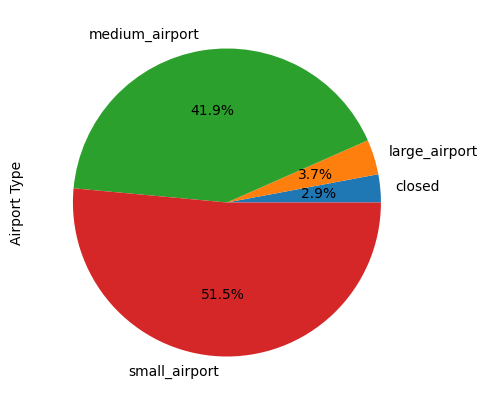

In [6]:
plot = data_set.plot.pie(autopct='%1.1f%%',figsize=(5, 5),legend=False)
# plot.legend(loc='lower right')

In [7]:
geometry =[Point(xy) for xy in zip(df['longitude_deg'],df['latitude_deg'])]
gdf = GeoDataFrame(df,geometry=geometry)
gdf

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,geometry
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,POINT (-74.93360 40.07080)
1,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,POINT (-101.47391 38.70402)
2,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,POINT (-151.69600 59.94920)
3,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,POINT (-86.77030 34.86480)
4,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,POINT (-91.25490 35.60870)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58908,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,0.0,AS,CN,CN-21,Yingkou,yes,ZYYK,YKH,NaN,POINT (122.35860 40.54252)
58909,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,AS,CN,CN-21,Shenyang,no,ZYYY,NaN,NaN,POINT (123.49600 41.78440)
58910,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,POINT (1.48250 51.89444)
58911,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,POINT (47.29639 -11.58428)


In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world[world['name']=='Iran']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
107,82913906.0,Asia,Iran,IRN,453996,"POLYGON ((48.56797 29.92678, 48.01457 30.45246..."


<AxesSubplot: >

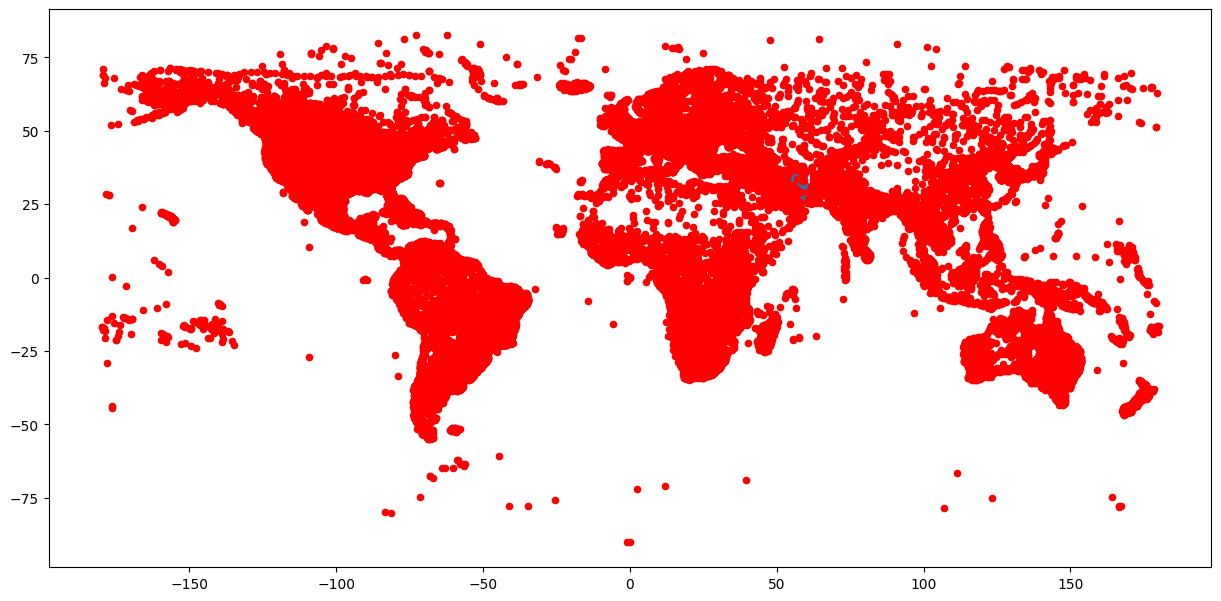

In [13]:
gdf.plot(ax=world[world['name']=='Iran'].plot(figsize=(15,15)),marker='o',color='red',markersize=20)

In [10]:
import plotly.express as px
import pandas as pd

In [16]:
df

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,geometry
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,POINT (-74.93360 40.07080)
1,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,POINT (-101.47391 38.70402)
2,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,POINT (-151.69600 59.94920)
3,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,POINT (-86.77030 34.86480)
4,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,POINT (-91.25490 35.60870)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58908,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,0.0,AS,CN,CN-21,Yingkou,yes,ZYYK,YKH,NaN,POINT (122.35860 40.54252)
58909,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,AS,CN,CN-21,Shenyang,no,ZYYY,NaN,NaN,POINT (123.49600 41.78440)
58910,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,POINT (1.48250 51.89444)
58911,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,POINT (47.29639 -11.58428)


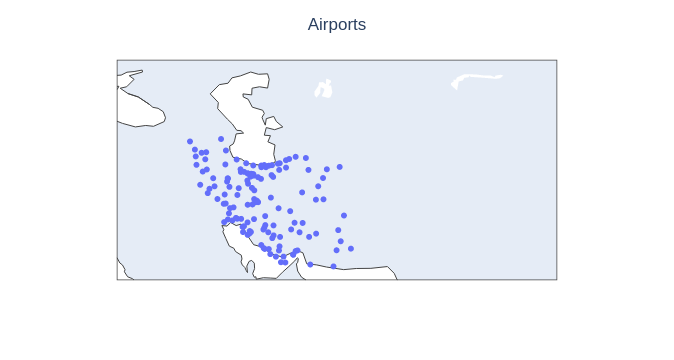

In [17]:
fig = px.scatter_geo(df[df['iso_country']=='IR'],lat='latitude_deg',lon='longitude_deg', hover_name='name')
fig.update_layout(title = 'Airports', title_x=0.5)
fig.show()